In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('/content/coursea_data.csv')

print(df.head())

   Unnamed: 0                                       course_title  \
0         134  (ISC)² Systems Security Certified Practitioner...   
1         743  A Crash Course in Causality:  Inferring Causal...   
2         874                     A Crash Course in Data Science   
3         413                            A Law Student's Toolkit   
4         635                A Life of Happiness and Fulfillment   

          course_organization course_Certificate_type  course_rating  \
0                      (ISC)²          SPECIALIZATION            4.7   
1  University of Pennsylvania                  COURSE            4.7   
2    Johns Hopkins University                  COURSE            4.5   
3             Yale University                  COURSE            4.7   
4   Indian School of Business                  COURSE            4.8   

  course_difficulty course_students_enrolled  
0          Beginner                     5.3k  
1      Intermediate                      17k  
2             Mix

In [7]:
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
course_title,0
course_organization,0
course_Certificate_type,0
course_rating,0
course_difficulty,0
course_students_enrolled,0


In [9]:
df.describe()

,Unnamed: 0,course_rating
count,891.000000,891.000000
mean,445.000000,4.677329
std,257.353842,0.162225
min,0.000000,3.300000
25%,222.500000,4.600000
50%,445.000000,4.700000
75%,667.500000,4.800000
max,890.000000,5.000000


Data Preprocessing



In [10]:
# convert '5.3k' or '2M' to numeric
def convert_to_numeric(value):
    value = str(value).lower().strip()  # Convert to string and lower case
    if 'k' in value:  # Convert 'k' to thousands
        return float(value.replace('k', '')) * 1000
    elif 'm' in value:  # Convert 'M' to millions
        return float(value.replace('m', '')) * 1000000
    else:  # Assume value is already numeric
        return float(value)


df['course_students_enrolled'] = df['course_students_enrolled'].apply(convert_to_numeric).astype(int)


df['combined_features'] = (
    df['course_title'] + " " +
    df['course_organization'] + " " +
    df['course_Certificate_type'] + " " +
    df['course_difficulty']
)

# Display the processed dataframe
print(df.head())


   Unnamed: 0                                       course_title  \
0         134  (ISC)² Systems Security Certified Practitioner...   
1         743  A Crash Course in Causality:  Inferring Causal...   
2         874                     A Crash Course in Data Science   
3         413                            A Law Student's Toolkit   
4         635                A Life of Happiness and Fulfillment   

          course_organization course_Certificate_type  course_rating  \
0                      (ISC)²          SPECIALIZATION            4.7   
1  University of Pennsylvania                  COURSE            4.7   
2    Johns Hopkins University                  COURSE            4.5   
3             Yale University                  COURSE            4.7   
4   Indian School of Business                  COURSE            4.8   

  course_difficulty  course_students_enrolled  \
0          Beginner                      5300   
1      Intermediate                     17000   
2          

Exploratory Data Analysis (EDA)

course_organization
University of Pennsylvania    59
University of Michigan        41
Google Cloud                  34
Johns Hopkins University      28
Duke University               28
Name: count, dtype: int64
course_difficulty
Advanced        4.600000
Beginner        4.680903
Intermediate    4.646465
Mixed           4.708556
Name: course_rating, dtype: float64


<Axes: >

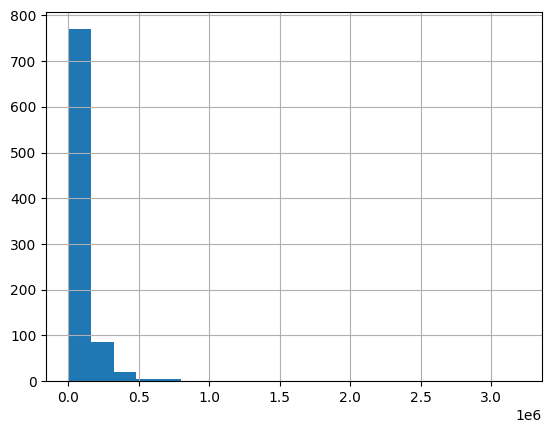

In [11]:

print(df['course_organization'].value_counts().head())

print(df.groupby('course_difficulty')['course_rating'].mean())

df['course_students_enrolled'].hist(bins=20)


Analyze the Distribution of Ratings

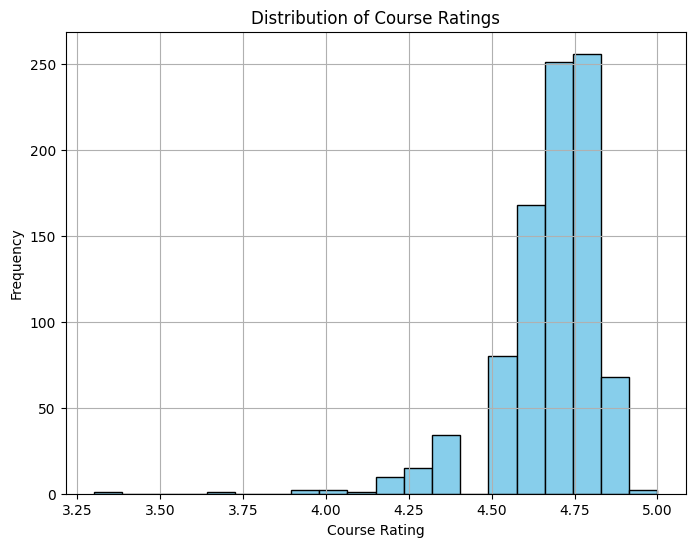

In [12]:
import matplotlib.pyplot as plt

# Plot the distribution of course ratings
plt.figure(figsize=(8,6))
df['course_rating'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Course Ratings')
plt.xlabel('Course Rating')
plt.ylabel('Frequency')
plt.show()



# Scatter plot to analyze the relationship between course students enrolled and ratings


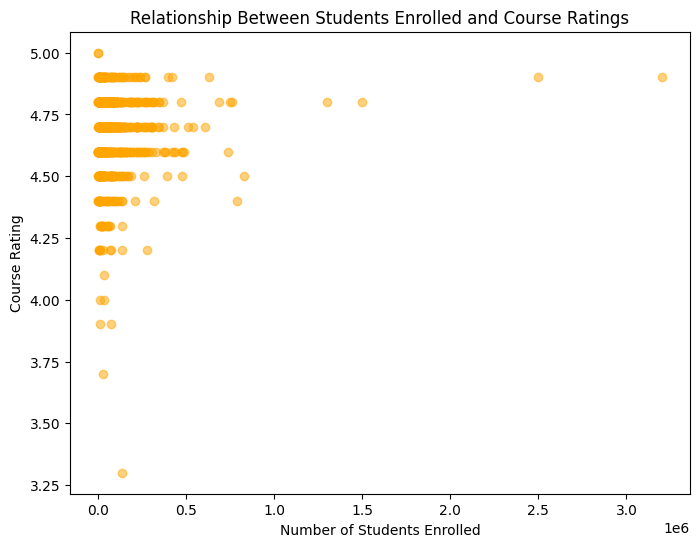

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(df['course_students_enrolled'], df['course_rating'], alpha=0.5, color='orange')
plt.title('Relationship Between Students Enrolled and Course Ratings')
plt.xlabel('Number of Students Enrolled')
plt.ylabel('Course Rating')
plt.show()


Explore Relationships in the Data

(a) Distribution of Ratings

<ipython-input-14-9ac8096d2112>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='course_rating', data=df, palette='viridis')


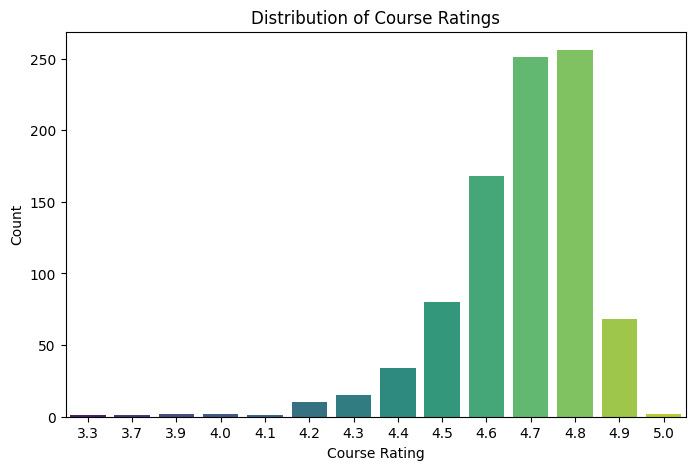

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of course ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='course_rating', data=df, palette='viridis')
plt.title('Distribution of Course Ratings')
plt.xlabel('Course Rating')
plt.ylabel('Count')
plt.show()


(b) Analyze Popular Course Organizations

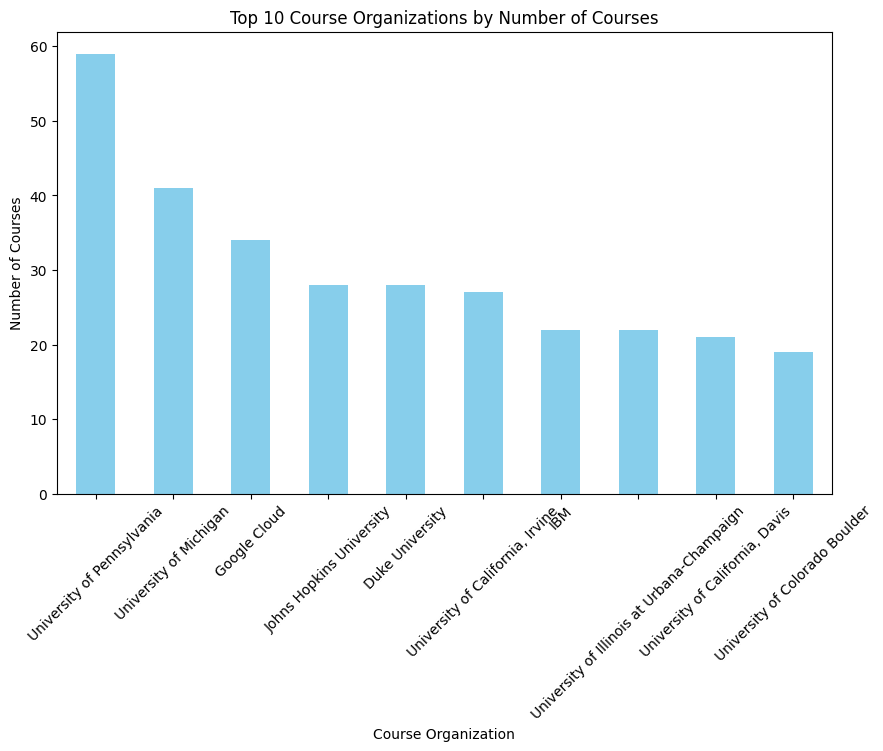

In [15]:

top_orgs = df['course_organization'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
top_orgs.plot(kind='bar', color='skyblue')
plt.title('Top 10 Course Organizations by Number of Courses')
plt.xlabel('Course Organization')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45)
plt.show()


(c) Relationship Between Course Difficulty and Students Enrolled



<ipython-input-16-05ffb853dbfd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='course_difficulty', y='course_students_enrolled', data=df, palette='coolwarm')


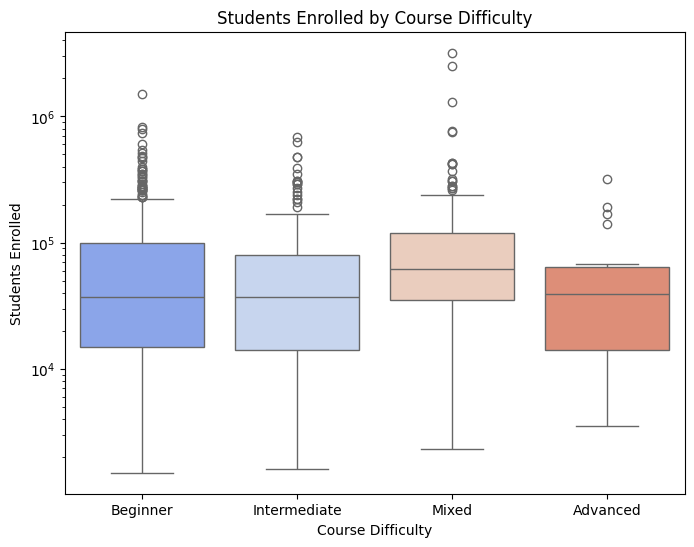

In [16]:
# Boxplot for course difficulty and students enrolled
plt.figure(figsize=(8, 6))
sns.boxplot(x='course_difficulty', y='course_students_enrolled', data=df, palette='coolwarm')
plt.title('Students Enrolled by Course Difficulty')
plt.xlabel('Course Difficulty')
plt.ylabel('Students Enrolled')
plt.yscale('log')
plt.show()


<ipython-input-17-cd21c611038d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='course_difficulty', y='course_rating', data=df, palette='coolwarm')


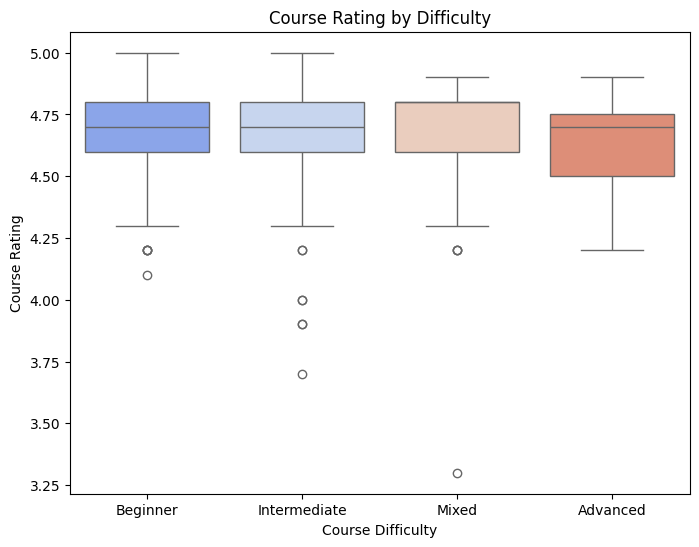

In [17]:
# (d) Relationship between Course Difficulty and Rating
plt.figure(figsize=(8, 6))
sns.boxplot(x='course_difficulty', y='course_rating', data=df, palette='coolwarm')
plt.title('Course Rating by Difficulty')
plt.xlabel('Course Difficulty')
plt.ylabel('Course Rating')
plt.show()

<ipython-input-18-0327da351767>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='course_Certificate_type', y='course_rating', data=df, palette='coolwarm')


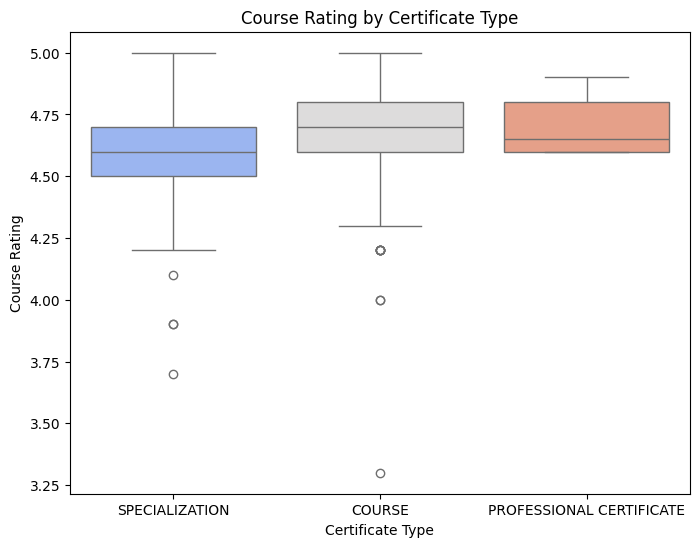

In [18]:
# (e)  Analyze Certificate Type and Rating
plt.figure(figsize=(8, 6))
sns.boxplot(x='course_Certificate_type', y='course_rating', data=df, palette='coolwarm')
plt.title('Course Rating by Certificate Type')
plt.xlabel('Certificate Type')
plt.ylabel('Course Rating')
plt.show()

Group-Level Aggregates

Average Students by Difficulty

In [26]:
avg_students = df.groupby('course_difficulty')['course_students_enrolled'].mean().sort_values()
print(avg_students)


course_difficulty
0     66547.368421
2     73264.141414
1     81974.948665
3    133633.155080
Name: course_students_enrolled, dtype: float64


Average Rating by Organization:


In [27]:
avg_rating = df.groupby('course_organization')['course_rating'].mean().sort_values(ascending=False)
print(avg_rating.head())


course_organization
36     4.9
61     4.9
112    4.9
19     4.9
51     4.9
Name: course_rating, dtype: float64


Advanced Analysis

Feature Engineering: Add new columns to
capture additional insights.

Students enrolled per rating point

In [28]:
df['students_per_rating'] = df['course_students_enrolled'] / df['course_rating']
print(df[['course_title', 'students_per_rating']].head())


                                        course_title  students_per_rating
0  (ISC)² Systems Security Certified Practitioner...          1127.659574
1  A Crash Course in Causality:  Inferring Causal...          3617.021277
2                     A Crash Course in Data Science         28888.888889
3                            A Law Student's Toolkit         19361.702128
4                A Life of Happiness and Fulfillment         66666.666667


Hypothesis Testing:

Test if there’s a significant difference in enrollment numbers between course difficulties.

In [29]:
from scipy.stats import f_oneway

groups = [df[df['course_difficulty'] == diff]['course_students_enrolled'] for diff in df['course_difficulty'].unique()]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_value}")


ANOVA F-statistic: 4.61764947472961, p-value: 0.003260441784982303


Predictive Modeling

In [31]:
X = df[['course_students_enrolled', 'course_difficulty']]
y = df['course_rating']

# Convert categorical features to numerical using one-hot encoding or label encoding
X = pd.get_dummies(X, columns=['course_difficulty'], drop_first=True)


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [33]:

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Other possible models:
# RandomForestRegressor
# GradientBoostingRegressor
# Support Vector Machines
# Try different models and tune hyperparameters.

Mean Squared Error: 0.016890721179628216


In [34]:
# prompt: plz check above model  is good
#  accuracy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/coursea_data.csv')

# Data preprocessing
def convert_to_numeric(value):
    value = str(value).lower().strip()
    if 'k' in value:
        return float(value.replace('k', '')) * 1000
    elif 'm' in value:
        return float(value.replace('m', '')) * 1000000
    else:
        try:
            return float(value)
        except ValueError:
            return np.nan  # Handle non-numeric values

df['course_students_enrolled'] = df['course_students_enrolled'].apply(convert_to_numeric)
df.dropna(subset=['course_students_enrolled'], inplace=True) #drop rows with NaN values
df['course_students_enrolled'] = df['course_students_enrolled'].astype(int)

# Feature Engineering (Example: Combine relevant features)
# ... (Your existing feature engineering code) ...

# Encoding categorical features
label_encoder = LabelEncoder()
df['course_difficulty'] = label_encoder.fit_transform(df['course_difficulty'])
df['course_Certificate_type'] = label_encoder.fit_transform(df['course_Certificate_type'])
df['course_organization'] = label_encoder.fit_transform(df['course_organization'])


# Define features (X) and target variable (y)
X = df[['course_students_enrolled', 'course_difficulty', 'course_Certificate_type', 'course_organization']]  # Include other relevant features
y = df['course_rating']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_r2 = r2_score(y_test, linear_y_pred)
print(f"Linear Regression - Mean Squared Error: {linear_mse}, R-squared: {linear_r2}")


# Train a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) #n_estimators can be adjusted
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f"Random Forest - Mean Squared Error: {rf_mse}, R-squared: {rf_r2}")


# Train a Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train,y_train)
dt_y_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

print(f"Decision Tree - Mean Squared Error: {dt_mse}, R-squared: {dt_r2}")

Linear Regression - Mean Squared Error: 0.015358361254449969, R-squared: 0.03309377735326113
Random Forest - Mean Squared Error: 0.017394992796399875, R-squared: -0.09512509173860995
Decision Tree - Mean Squared Error: 0.034189944134078235, R-squared: -1.1524737690101001
